<a href="https://colab.research.google.com/github/Callum-Roberts713/MiscPythonCode/blob/main/Numerical_modelling_and_simulation_assignment_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib nbagg


In [ ]:
#initial data
#P is positional co-ordinates in meters
#V is velocity along the x and y directions in meters per second
#M is the mass of each planet or moon in kilograms
#orbit is the orbital distance for each moon
#Jupiter
P_X= 0
P_Y= 0
V_X= 0
V_Y= 0
M_J= 1.89819e+27
#Io
P_X_Io= -421700000
P_Y_Io= 0
V_X_Io= 0
V_Y_Io= -17334
M_Io= 8.9319e+22
Orbit_Io=421700000
#Europa
P_X_E= -670900000
P_Y_E= 0
V_X_E= 0
V_Y_E= -13740
M_E= 4.7998e+22
Orbit_E= 670900000
#Ganymede
P_X_G= -1070400000
P_Y_G= 0
V_X_G= 0
V_Y_G= -10880
M_G= 1.4819e+23
#Callisto
P_X_C= -1882700000
P_Y_C= 0
V_X_C= 0
V_Y_C= -8204
M_C= 1.0759e+23
Orbit_C= 1882700000
#Gravitational Constant in meters cubed per kilogram per second squared
G= 6.67408e-11




In [ ]:
#task 1 a
#t is a time array for the space of a year an hour apart each time
# to make the year in seconds into gaps of one hour intervals we stated the length on the array as a year in seconds and then the
#gap between each point in the array is the number of seconds in one hour
t= np.arange(0,31539600,3600)
print (t)
#these are the initial values of x, y, vx and vy for both jupiter and io later to be used in the ivp solver
state_init_set= [ P_X_Io, P_Y_Io, V_X_Io, V_Y_Io]
state_init_set_J=[P_X,P_Y,V_X,V_Y]
#this is the number of seconds in a year which will later be used in the solver to set the length of the array for which it will be solving the derivatives
T = 365*24*3600
print (len(t))


[       0     3600     7200 ... 31528800 31532400 31536000]
8761


In [ ]:
#this is my derivative function to obtain the derivatives of x,y,vx and vy as dx/dt, dy/dt, dvx/dt and dvy/dt assuming that
#the derivative of the position is the velocity at a given time and the derivative of the velocity is the acceleration at a given time
#we get around the problem of the solver not being able to divide by zero by saying that if x is the position of jupiter than the derivatives will always be zero


def derivative(t, state):
    x, y , vx, vy= state.reshape(4,)
    if x==P_X:
        ax=0
        ay=0
    else:
        Rx = P_X - x
        Ry = P_Y - y

        R = ((Rx**2)+(Ry**2))**0.5
        ax= (G*(M_J/(R**2))*(Rx/R))
        ay= (G*(M_J/(R**2))*(Ry/R))

    return ([vx,vy,ax,ay])




In [ ]:
# this is the solver in the case of Io using our initial states from earlier as our initial y values the solver will then
#integrate each x, y, vx and vy against the values of time in the intervals of 1 hour over a year to obtain a clear simulation
#of the orbital path of the moon and what velocity it holds at each position in both the x and the y axis
sol= solve_ivp(derivative,t_span = [0,T], y0=state_init_set , t_eval = t , rtol=1e-8,atol=1e-10)
print(sol.message)
#this just allows me to print any of the solutions i want out of the solver as an array rather than the solver automatically showing me all of the solutions
for i in range(len(t)):
    print("x position",i,": ", sol.y[0][i])

The solver successfully reached the end of the integration interval.
x position 0 :  -421700000.0
x position 1 :  -417092068.64842415
x position 2 :  -403369024.31278074
x position 3 :  -380830906.9503313
x position 4 :  -349970469.41945803
x position 5 :  -311462373.7229943
x position 6 :  -266148407.69628692
x position 7 :  -215019039.70029417
x position 8 :  -159191729.1680502
x position 9 :  -99886461.71784365
x position 10 :  -38399055.90324743
x position 11 :  23927173.493468847
x position 12 :  85730779.79926021
x position 13 :  145661921.86415157
x position 14 :  202411837.67893097
x position 15 :  254741400.06789353
x position 16 :  301508140.6988126
x position 17 :  341691158.16820663
x position 18 :  374413354.9059448
x position 19 :  398960547.1768242
x position 20 :  414797009.10796857
x position 21 :  421577137.79787356
x position 22 :  419152972.18970066
x position 23 :  407577413.73270303
x position 24 :  387103075.2401126
x position 25 :  358176784.35869235
x position 

In [ ]:
#this is the solver for the case of jupiter in this case the solver is the same however the initial values are that of jupiter which in turn gives me a
#values of zero for every time interval as we would expect as we are simulation the moons from the perspective of jupiter
solJ= solve_ivp(derivative,t_span = [0,T], y0=state_init_set_J , t_eval = t , rtol=1e-8,atol=1e-10)
print(solJ)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([       0,     3600,     7200, ..., 31528800, 31532400, 31536000])
 t_events: None
        y: array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
 y_events: None


<IPython.core.display.Javascript object>


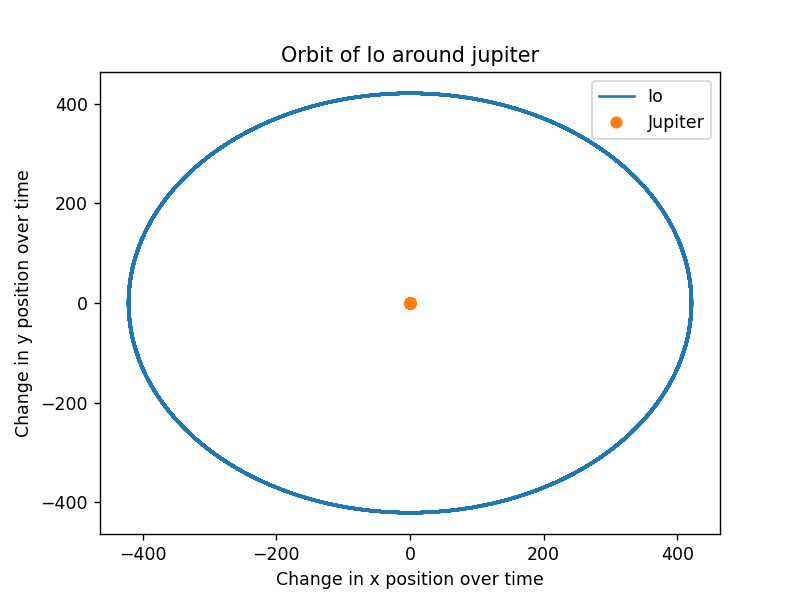

<function matplotlib.pyplot.show(block=None)>

In [ ]:
#here i am converting the positions into units of Km for the graph
x_posJ=solJ.y[0]*1e-6
y_posJ=solJ.y[1]*1e-6
x_pos= sol.y[0]*1e-6
y_pos= sol.y[1]*1e-6
#here i am creating a graph that will show the path of orbit that Io will take around jupiter and because jupiters values are all
#zero we can plot jupiters coordinates on the same graph and get a clearer picture of what the orbit will look like with jupiter in the center

plt.figure(1)
plt.plot(x_pos, y_pos, label="Io")
plt.plot(x_posJ,y_posJ,"o", label="Jupiter")
plt.xlabel('Change in x position over time')
plt.ylabel('Change in y position over time')
plt.title('Orbit of Io around jupiter')
plt.legend()
plt.show

<IPython.core.display.Javascript object>


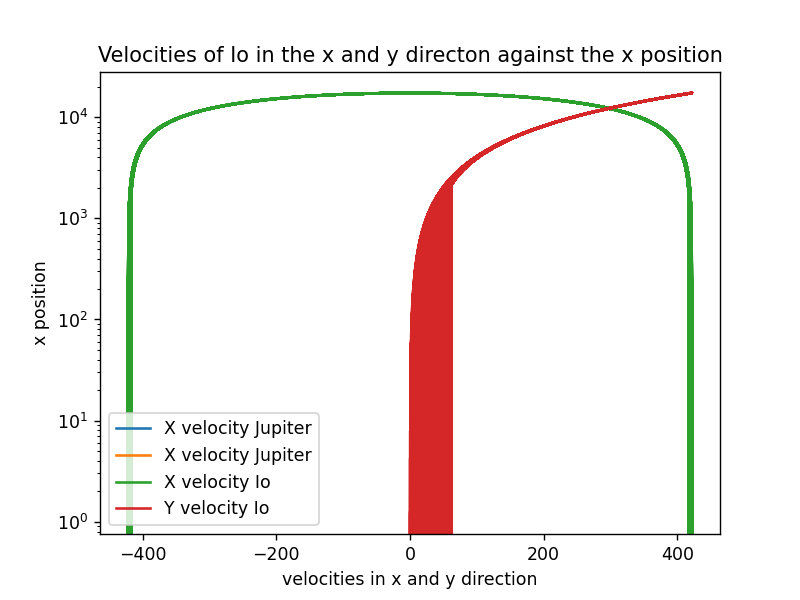

<function matplotlib.pyplot.show(block=None)>

In [ ]:
#this is a semilog plot of velocities in the x and y directions of Io along the course of its orbit Juoiters velocity
#will be zero at all points and therefore will not show up clearly on the graph
plt.figure(2)
plt.semilogy(x_posJ, solJ.y[2], label= "X velocity Jupiter")
plt.semilogy(x_posJ, solJ.y[3], label= "X velocity Jupiter")
plt.semilogy(x_pos, sol.y[2], label= "X velocity Io")
plt.semilogy(x_pos, sol.y[3], label= "Y velocity Io")
plt.xlabel('velocities in x and y direction')
plt.ylabel('x position')
plt.title('Velocities of Io in the x and y directon against the x position')
plt.legend()
plt.show

In [ ]:
#here i changed my derivative function to work out each individual x, y, vx and vy for all 4 moons and jupiter itself
#in doing this we need only use one solver at the end to obtain all of the values we desire

def DerivativeFull(t, state):
    x, y, vx, vy, x1,y1,vx1,vy1, x2,y2,vx2,vy2, x3,y3,vx3,vy3, x4,y4,vx4,vy4 = state.reshape(20,)
    Rx=P_X-x
    Ry=P_Y-y
    R=((Rx**2)+(Ry**2))**0.5
    ax= 0
    ay= 0

    Rx1 = P_X - x1
    Ry1 = P_Y - y1
    R1 = ((Rx1**2)+(Ry1**2))**0.5
    ax1= (G*(M_J/(R1**2))*(Rx1/R1))
    ay1= (G*(M_J/(R1**2))*(Ry1/R1))

    Rx2 = P_X - x2
    Ry2 = P_Y - y2
    R2 = ((Rx2**2)+(Ry2**2))**0.5
    ax2= (G*(M_J/(R2**2))*(Rx2/R2))
    ay2= (G*(M_J/(R2**2))*(Ry2/R2))

    Rx3 = P_X - x3
    Ry3 = P_Y - y3
    R3 = ((Rx3**2)+(Ry3**2))**0.5
    ax3= (G*(M_J/(R3**2))*(Rx3/R3))
    ay3= (G*(M_J/(R3**2))*(Ry3/R3))

    Rx4 = P_X - x4
    Ry4 = P_Y - y4
    R4 = ((Rx4**2)+(Ry4**2))**0.5
    ax4= (G*(M_J/(R4**2))*(Rx4/R4))
    ay4= (G*(M_J/(R4**2))*(Ry4/R4))



    return (vx, vy, ax, ay, vx1, vy1, ax1, ay1, vx2, vy2, ax2, ay2, vx3, vy3, ax3, ay3, vx4, vy4, ax4, ay4)



In [ ]:
#this is the initial values of all 4 moons and jupiter to put into the solver
state_init_full=[P_X,P_Y,V_X,V_Y,P_X_Io, P_Y_Io, V_X_Io, V_Y_Io,P_X_E, P_Y_E, V_X_E, V_Y_E, P_X_G, P_Y_G, V_X_G, V_Y_G,P_X_C, P_Y_C, V_X_C, V_Y_C]


In [ ]:
#this solver will give me all of the integrated values from all 4 moons and jupiter that can then be used to go into a later graph
solution= solve_ivp(DerivativeFull, t_span = [0,T], t_eval=t, y0=state_init_full  , rtol=1e-8, atol=1e-10)
print(solution.message)
#this again is just so i can look at any individual array of values that the solver creates without making the solver print out
#all 20 arrays each time i can change which array i want to look at by changing the number in the square brackets after the solution.y input
for i in range(len(t)):
    print("position",i,": ", solution.y[9][i])


The solver successfully reached the end of the integration interval.
position 0 :  0.0
position 1 :  -49419189.203497574
position 2 :  -98569805.11287273
position 3 :  -147184731.1541086
position 4 :  -194999755.8226012
position 5 :  -241755006.50152457
position 6 :  -287196358.35736823
position 7 :  -331076813.8000757
position 8 :  -373157843.0693654
position 9 :  -413210678.6969162
position 10 :  -451017557.81900114
position 11 :  -486372905.7216524
position 12 :  -519084452.5593935
position 13 :  -548974279.2054306
position 14 :  -575879785.1457824
position 15 :  -599654574.1139476
position 16 :  -620169251.5993531
position 17 :  -637312130.7140639
position 18 :  -650989842.4657948
position 19 :  -661127846.3521891
position 20 :  -667670839.113359
position 21 :  -670583059.3326837
position 22 :  -669848485.6710049
position 23 :  -665470928.021066
position 24 :  -657474010.8132482
position 25 :  -645901048.525372
position 26 :  -630814813.812319
position 27 :  -612297199.9792693
posi

<IPython.core.display.Javascript object>


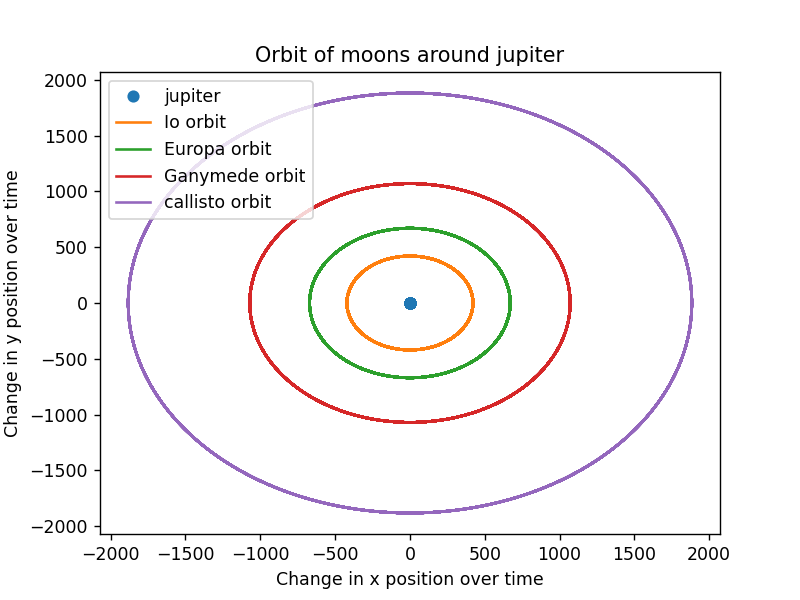

<function matplotlib.pyplot.show(block=None)>

In [ ]:
#here again i am converting the positional coordinates into units of Km i did not do jupiter as all the values will be zero so its unneccesary
x_posE=solution.y[8]*1e-6
x_posG=solution.y[12]*1e-6
x_posC=solution.y[16]*1e-6
y_posE=solution.y[9]*1e-6
y_posG=solution.y[13]*1e-6
y_posC=solution.y[17]*1e-6

#here i have created a graph that shows the orbital paths of all 4 moons around the centerpoint jupiter
plt.figure(3)
plt.plot(solution.y[0],solution.y[1], "o", label= "jupiter")
plt.plot(x_pos, y_pos, label="Io orbit")
plt.plot(x_posE,y_posE, label= "Europa orbit")
plt.plot(x_posG,y_posG, label= "Ganymede orbit")
plt.plot(x_posC,y_posC, label= "callisto orbit")

plt.xlabel('Change in x position over time')
plt.ylabel('Change in y position over time')
plt.title('Orbit of moons around jupiter')
plt.legend()
plt.show

In [ ]:
#to do this simulation again with the second order runge kutta method would create alot of difficulties as we would not be able to use the ivp solver
#and as such we would have to do each step of the runge kutta method ourselves using functions for each of the individual values
#whilst not an impossible task it would certainly require alot more code to write and process eachtime you wanted to obtain an array of values
# we would have to first obtain the derivatives which would be much the same however not having the integral solver would mean that
#we would have to use the explicit 2nd order runge kutta solution that we have seen in previous labs for each of the x, y, vx and vy
#values for each individual planet.
#as well as this the 2nd order runge kutta method is much less accurate than the 5th order so the uncertainties in the solutions would be much greater
#this would probably mean the graphs would be more difficult to interpret

<IPython.core.display.Javascript object>


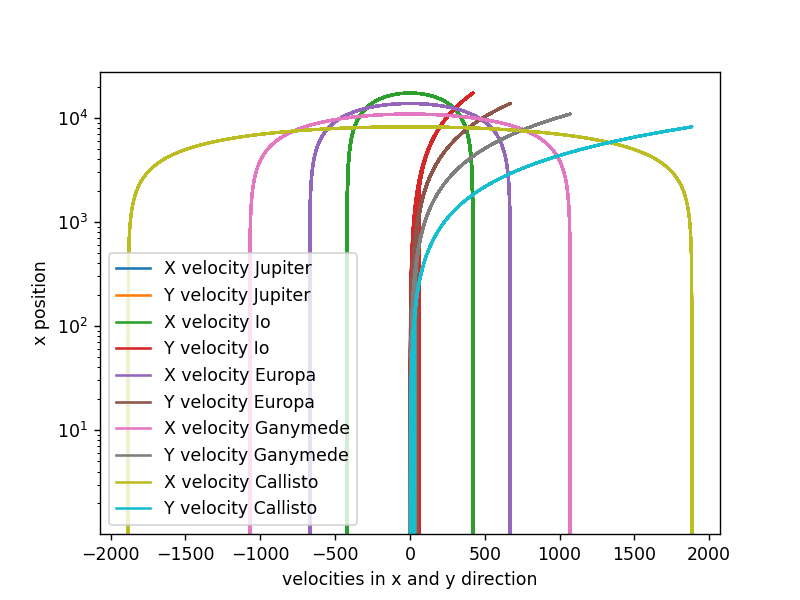

<function matplotlib.pyplot.show(block=None)>

In [ ]:
#here i have made a semilog graph of the velocities in both directoins of all 4 moons and jupiter
plt.figure(4)
plt.semilogy(x_posJ, solution.y[2], label= "X velocity Jupiter")
plt.semilogy(x_posJ, solution.y[3], label= "Y velocity Jupiter")
plt.semilogy(x_pos, solution.y[6], label= "X velocity Io")
plt.semilogy(x_pos, solution.y[7], label= "Y velocity Io")
plt.semilogy(x_posE, solution.y[10], label= "X velocity Europa" )
plt.semilogy(x_posE, solution.y[11], label= "Y velocity Europa" )
plt.semilogy(x_posG, solution.y[14], label= "X velocity Ganymede" )
plt.semilogy(x_posG, solution.y[15], label= "Y velocity Ganymede" )
plt.semilogy(x_posC, solution.y[18], label= "X velocity Callisto" )
plt.semilogy(x_posC, solution.y[19], label= "Y velocity Callisto" )
plt.xlabel('velocities in x and y direction')
plt.ylabel('x position')
plt.legend()
plt.show

In [ ]:
dp='.5f' #here i have defined the number of decimal places i want to be used as dp so that i dont have to type out '.5f' for each array

#here i have made a simple txt file showing the positions of all 4 moons with the time array there for reference
f= open('moon_orbits.txt', "a")
f.write(r'this is a file containing simlated data for the orbits of 4 of jupiters moons, Io, Europa, Ganymede and Callisto. The positions are measured in m and the velocities are measured in m/s'+'\n')
f.write(r'time               Io orbit, Km               Europa Orbit, Km               Ganymede Orbit, Km               Callisto Orbit, Km'+'\n')
for i in range(len(t)):
    f.write((str(format((t)[i],dp)))+'               '+(str(format(x_pos[i],dp)))+'               '+(str(format((x_posE)[i],dp)))+'                  '+(str(format((x_posG)[i],dp)))+'                       '+(str(format((x_posC)[i],dp)))+'  \n')
f.close()